In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('airline_passengers.csv',index_col='Month',parse_dates=True)
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [3]:
df.dropna(inplace=True)

In [4]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [5]:
df.index.freq='MS'

In [6]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [7]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [8]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [9]:
span=12
alpha=2/(span+1)

In [10]:
df['EWMA']=df['Thousands of Passengers'].ewm(alpha=alpha,adjust=False).mean()

In [11]:
df

,Thousands of Passengers,EWMA
Month,,
1949-01-01,112,112.000000
1949-02-01,118,112.923077
1949-03-01,132,115.857988
1949-04-01,129,117.879836
1949-05-01,121,118.359861
...,...,...
1960-08-01,606,494.898619
1960-09-01,508,496.914216
1960-10-01,461,491.388952


In [12]:
model=SimpleExpSmoothing(df['Thousands of Passengers'])

C:\Users\yashm\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [13]:
fitted_model=model.fit(smoothing_level=alpha,optimized=False)

In [14]:
df['SES12']=fitted_model.fittedvalues.shift(-1)

In [15]:
df

,Thousands of Passengers,EWMA,SES12
Month,,,
1949-01-01,112,112.000000,112.000000
1949-02-01,118,112.923077,112.923077
1949-03-01,132,115.857988,115.857988
1949-04-01,129,117.879836,117.879836
1949-05-01,121,118.359861,118.359861
...,...,...,...
1960-08-01,606,494.898619,494.898619
1960-09-01,508,496.914216,496.914216
1960-10-01,461,491.388952,491.388952


## Next 

In [16]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [17]:
df['DES_add_12']=ExponentialSmoothing(df['Thousands of Passengers'],trend='add').fit().fittedvalues.shift(-1)

C:\Users\yashm\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [18]:
df

,Thousands of Passengers,EWMA,SES12,DES_add_12
Month,,,,
1949-01-01,112,112.000000,112.000000,114.221156
1949-02-01,118,112.923077,112.923077,120.175837
1949-03-01,132,115.857988,115.857988,134.115056
1949-04-01,129,117.879836,117.879836,131.244976
1949-05-01,121,118.359861,118.359861,123.283465
...,...,...,...,...
1960-08-01,606,494.898619,494.898619,608.358441
1960-09-01,508,496.914216,496.914216,510.986001
1960-10-01,461,491.388952,491.388952,463.593235


In [19]:
df['TES_mul_12']=ExponentialSmoothing(df['Thousands of Passengers'],trend='mul',seasonal='mul', seasonal_periods=12).fit().fittedvalues

C:\Users\yashm\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\yashm\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [20]:
df

,Thousands of Passengers,EWMA,SES12,DES_add_12,TES_mul_12
Month,,,,,
1949-01-01,112,112.000000,112.000000,114.221156,111.596793
1949-02-01,118,112.923077,112.923077,120.175837,118.841794
1949-03-01,132,115.857988,115.857988,134.115056,133.334074
1949-04-01,129,117.879836,117.879836,131.244976,127.898917
1949-05-01,121,118.359861,118.359861,123.283465,120.977474
...,...,...,...,...,...
1960-08-01,606,494.898619,494.898619,608.358441,629.401477
1960-09-01,508,496.914216,496.914216,510.986001,511.999868
1960-10-01,461,491.388952,491.388952,463.593235,448.034587


<AxesSubplot:xlabel='Month'>

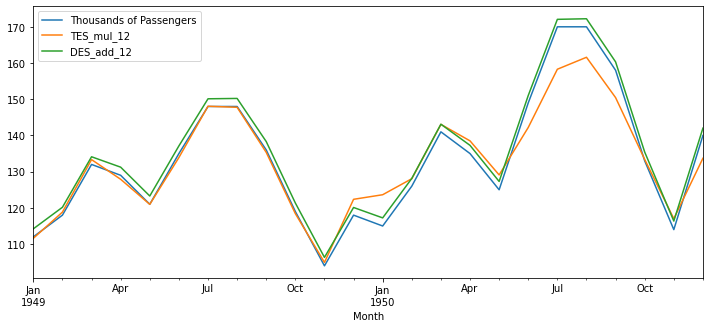

In [27]:
df[['Thousands of Passengers','TES_mul_12','DES_add_12']].iloc[:24].plot(figsize=(12,5))

# Thank You !!